# Flat Pipeline

In [2]:
import sys

import polars as pl

from nebula.base import Transformer
from nebula.transformers import *
from nebula.storage import nebula_storage as ns
from nebula.pipelines.pipelines import TransformerPipeline
from nebula.pipelines.pipeline_loader import load_pipeline

py_version = ".".join(map(str, (sys.version_info[0:2])))
print("python version:", py_version)

python version: 3.10


## Create a pipeline using python

3 transformers:

- EmptyStringToNull
- Distinct
- CoalescePartitions

To show the pipeline steps without actually running it, call the method `show`.

In [3]:
def simple_function(_df):
    print(f"Hello I'm 'simple_function' -> this is a: {type(_df)}")
    return _df


def function_with_args_and_kwargs(_df, *args, coef):
    print(f"Hello I'm 'function_with_args_and_kwargs' -> this is a: {type(_df)}")
    return _df


pipe = TransformerPipeline(
    [
        SelectColumns(columns=["c2", "c3"]),
        AssertNotEmpty(),
        # simple_function,
        # (function_with_args_and_kwargs, (1,2,3), {"coef": 2.5})
    ],
    # name="flat_pipeline",
    description="HELLO",
)

print("PRINT WITHOUT PARAMS")
pipe.show(add_params=False)
print("\nPRINT WITH PARAMS")
pipe.show(add_params=True)

PRINT WITHOUT PARAMS
*** TransformerPipeline *** (2 transformers)
 - SelectColumns
 - AssertNotEmpty

PRINT WITH PARAMS
*** TransformerPipeline *** (2 transformers)
 - SelectColumns -> PARAMS: columns=['c2', 'c3']
 - AssertNotEmpty


### If graphviz is installed

https://graphviz.org/download/

To render the the pipeline, call the method `plot`.<br>
If your `Python` version is less than 3.8, there might be some visualization issues.

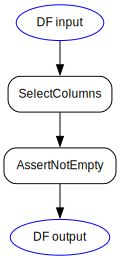

In [3]:
pipe.plot(add_params=False)

To add the transformer parameters, simply set `add_params=True` in the `show` method as follows:

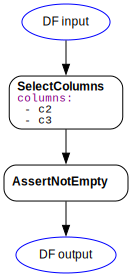

In [4]:
pipe.plot(add_params=True, add_transformer_description=True)

## Actual run

In [5]:
df_input = pl.DataFrame({"c1": [1, 2], "c2": [3, 4], "c3": [5, 6]})

df_out = pipe.run(df_input)
df_out.show()

2025-12-23 21:44:59,617 | pipelines.py:588 [INFO]: Running *** TransformerPipeline ***: "flat_pipeline" (2 transformers) 
2025-12-23 21:44:59,620 | pipelines.py:248 [INFO]: Running SelectColumns -> PARAMS: columns=['c2', 'c3'] ... 
2025-12-23 21:44:59,633 | pipelines.py:266 [INFO]: Execution time for SelectColumns: 0.0s 
2025-12-23 21:44:59,633 | pipelines.py:248 [INFO]: Running AssertNotEmpty ... 
2025-12-23 21:44:59,637 | pipelines.py:266 [INFO]: Execution time for AssertNotEmpty: 0.0s 
2025-12-23 21:44:59,639 | pipelines.py:1389 [INFO]: Pipeline run completed in 0 seconds. 


c2,c3
i64,i64
3,5
4,6


## Create the same pipeline using yaml

In [ ]:
yml_data = """
pipeline:
  - transformer: EmptyStringToNull
    params:
      columns: ["c2", "c3"]
  - transformer: Distinct
  - transformer: CoalescePartitions
    params:
        num_partitions: 5
"""

pipe_cfg = yaml.safe_load(yml_data)

# from nebula.spark_pipelines.pipeline_loader import load_pipeline
pipe = load_pipeline(pipe_cfg)

pipe.show_pipeline(add_params=True)

In [ ]:
pipe.run(df_input).show()